In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



Dataset loaded successfully.
Dataset shape: (277, 22)

First few rows:
   blockNumber                                          blockHash   timeStamp  \
0      8472545  0x671c321d574442aa6d5201f10248038051b0fcadf744...  1567451347   
1      8472638  0xafcd760b6afcd557d6f04111dfa5bb9caf1bed95226c...  1567452595   
2      8545898  0x4f6264eec25c77a281a4c02885f52ea4b1b01763a1e1...  1568440161   
3     10930336  0x04072abf76a394355a283a271c1f1ad2c0770d4d234c...  1601016752   
4     10946527  0x5f2f34c06f1ae86671da5b86b516699fa7687d088a29...  1601235410   

                                                hash  nonce  transactionIndex  \
0  0x1c61798644a09960097e8d16570248b3e899e5437ca3...    696                24   
1  0xcac4ca8b91a33e216c1c94f6fcc8482ef512a185bcc5...    702                29   
2  0x4222b4ec01ba08cbc4d02b349a76dc468ecb64a108f9...    714                92   
3  0x60d625f026853e117176228fe5313a0d3f769b0e9a7c...   1257               116   
4  0xce956fd4904e3ee277b7bede5d335c0a

In [21]:

try:
    df = pd.read_csv('data/compound_v2_v3_transactions.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'data/compound_v2_v3_transactions.csv' not found.")
    print("Please make sure the CSV file is in the correct directory.")
    df = pd.DataFrame() 
if not df.empty:
    print(f"Dataset shape: {df.shape}")
   

Dataset loaded successfully.
Dataset shape: (277, 22)


In [20]:
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['blockNumber', 'blockHash', 'timeStamp', 'hash', 'nonce', 'transactionIndex', 'from', 'to', 'value', 'gas', 'gasPrice', 'input', 'methodId', 'functionName', 'contractAddress', 'cumulativeGasUsed', 'txreceipt_status', 'gasUsed', 'confirmations', 'isError', 'wallet_address', 'protocol_version']


In [ ]:
print("Dataset Info:\n")
df.info()



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   blockNumber        277 non-null    int64  
 1   blockHash          277 non-null    object 
 2   timeStamp          277 non-null    int64  
 3   hash               277 non-null    object 
 4   nonce              277 non-null    int64  
 5   transactionIndex   277 non-null    int64  
 6   from               277 non-null    object 
 7   to                 277 non-null    object 
 8   value              277 non-null    int64  
 9   gas                277 non-null    int64  
 10  gasPrice           277 non-null    int64  
 11  input              277 non-null    object 
 12  methodId           277 non-null    object 
 13  functionName       277 non-null    object 
 14  contractAddress    0 non-null      float64
 15  cumulativeGasUsed  277 non-null    int64  
 16  txreceipt_s

In [27]:
print("\nMissing values (%):")
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))


Missing values (%):
contractAddress      100.0
blockNumber            0.0
timeStamp              0.0
hash                   0.0
nonce                  0.0
blockHash              0.0
transactionIndex       0.0
from                   0.0
value                  0.0
to                     0.0
gasPrice               0.0
input                  0.0
methodId               0.0
gas                    0.0
functionName           0.0
cumulativeGasUsed      0.0
txreceipt_status       0.0
gasUsed                0.0
confirmations          0.0
isError                0.0
wallet_address         0.0
protocol_version       0.0
dtype: float64


In [24]:
print("\nUnique values in key columns:")
if 'protocol_version' in df.columns:
    print(f"Protocol versions: {df['protocol_version'].unique()}")
if 'functionName' in df.columns:
    print(f"\nTop 10 function names:")
    print(df['functionName'].value_counts().head(10))
if 'isError' in df.columns:
    print(f"\nError distribution:")
    print(df['isError'].value_counts(normalize=True))


Unique values in key columns:
Protocol versions: ['V2' 'V3']

Top 10 function names:
functionName
mint(uint256 mintedAmount)                   111
enterMarkets(address[] cTokens)               33
redeem(uint256 tokens)                        27
borrow(uint256 borrowAmount)                  21
redeemUnderlying(uint256 redeemAmount)        19
repayBorrow(uint256 repayAmount)              18
exitMarket(address cTokenAddress)             16
approve(address _spender, uint256 _value)     10
transfer(address _to, uint256 _value)          8
withdraw(address to, uint256 value)            6
Name: count, dtype: int64

Error distribution:
isError
0    0.981949
1    0.018051
Name: proportion, dtype: float64


In [28]:
print("\nUnique values in key columns:")
if 'protocol_version' in df.columns:
    print(f"Protocol versions: {df['protocol_version'].unique()}")
if 'functionName' in df.columns:
    print(f"Top 10 function names: {df['functionName'].value_counts().head(10)}")


Unique values in key columns:
Protocol versions: ['V2' 'V3']
Top 10 function names: functionName
mint(uint256 mintedAmount)                   111
enterMarkets(address[] cTokens)               33
redeem(uint256 tokens)                        27
borrow(uint256 borrowAmount)                  21
redeemUnderlying(uint256 redeemAmount)        19
repayBorrow(uint256 repayAmount)              18
exitMarket(address cTokenAddress)             16
approve(address _spender, uint256 _value)     10
transfer(address _to, uint256 _value)          8
withdraw(address to, uint256 value)            6
Name: count, dtype: int64


In [29]:
if not df.empty:
    
    relevant_columns = ['from', 'to', 'value', 'gas', 'gasPrice', 'gasUsed',
                        'timeStamp', 'isError', 'txreceipt_status', 'functionName',
                        'wallet_address', 'protocol_version', 'methodId', 'blockNumber']

    
    existing_columns = [col for col in relevant_columns if col in df.columns]
    print(f"\nKeeping these {len(existing_columns)} relevant columns: {existing_columns}")

    
    df_clean = df[existing_columns].copy()
    print(f"\nCleaned dataset shape: {df_clean.shape}")


Keeping these 14 relevant columns: ['from', 'to', 'value', 'gas', 'gasPrice', 'gasUsed', 'timeStamp', 'isError', 'txreceipt_status', 'functionName', 'wallet_address', 'protocol_version', 'methodId', 'blockNumber']

Cleaned dataset shape: (277, 14)


###  Data Type Conversion and Preprocessing

In [ ]:

if not df.empty:
    # Convert timestamp to a readable datetime format
    if 'timeStamp' in df_clean.columns:
        df_clean['timeStamp'] = pd.to_datetime(df_clean['timeStamp'], unit='s')

    # Convert 'value' column to a numeric type, coercing errors
    if 'value' in df_clean.columns:
        df_clean['value'] = pd.to_numeric(df_clean['value'], errors='coerce')

    # Fill missing values for key categorical columns
    if 'functionName' in df_clean.columns:
        df_clean['functionName'] = df_clean['functionName'].fillna('unknown')
    if 'protocol_version' in df_clean.columns:
        df_clean['protocol_version'] = df_clean['protocol_version'].fillna('unknown')
    if 'methodId' in df_clean.columns:
        df_clean['methodId'] = df_clean['methodId'].fillna('0x00000000')

    # Convert other numeric columns, coercing any errors
    numeric_cols = ['gas', 'gasPrice', 'gasUsed', 'blockNumber']
    for col in numeric_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # Drop rows where essential numeric values are missing after conversion
    df_clean.dropna(subset=['value'], inplace=True)

    print("\nData types after conversion:")
    print(df_clean.dtypes)
    print(f"\nTotal missing values after cleaning: {df_clean.isnull().sum().sum()}")
    print(f"Shape after final cleaning: {df_clean.shape}")



Data types after conversion:
from                        object
to                          object
value                        int64
gas                          int64
gasPrice                     int64
gasUsed                      int64
timeStamp           datetime64[ns]
isError                      int64
txreceipt_status             int64
functionName                object
wallet_address              object
protocol_version            object
methodId                    object
blockNumber                  int64
dtype: object

Total missing values after cleaning: 0
Shape after final cleaning: (277, 14)


### Basic EDA Visualizations


Generating EDA Visualizations...


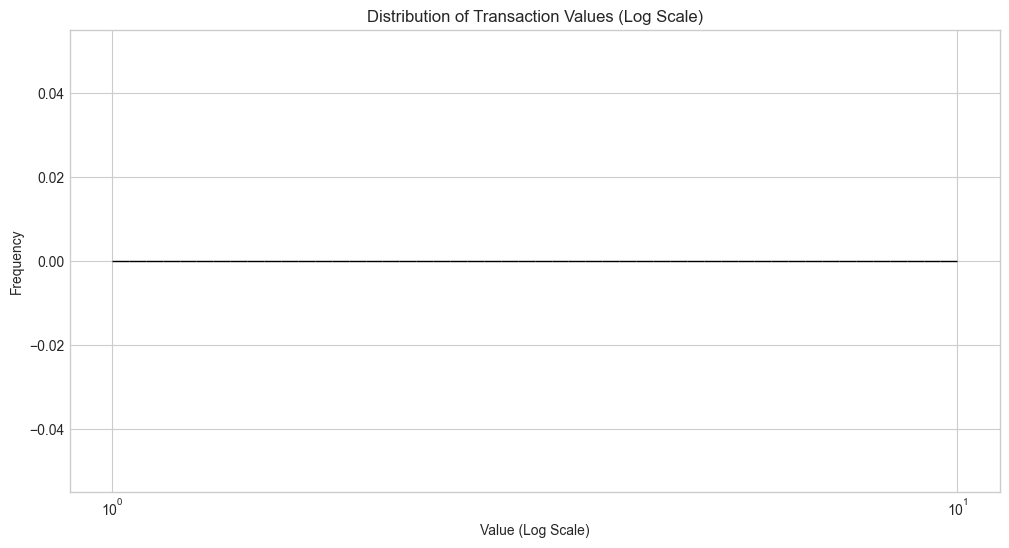

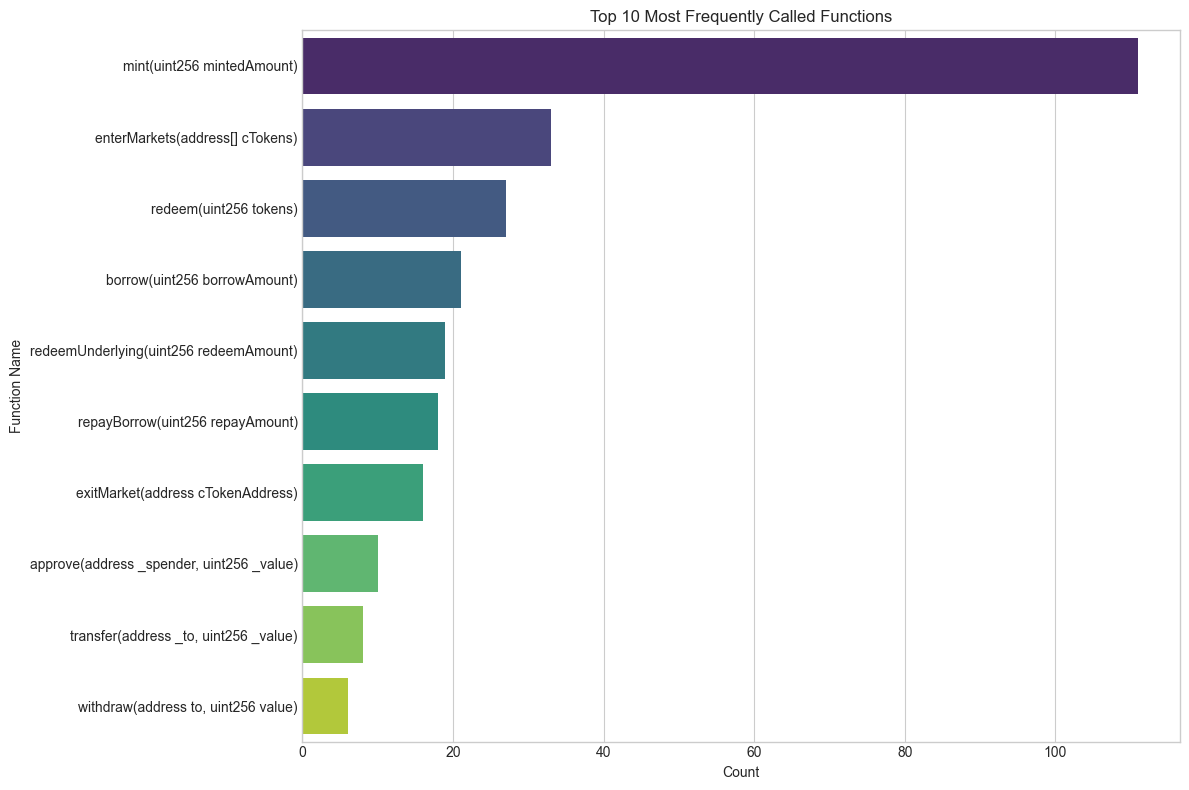

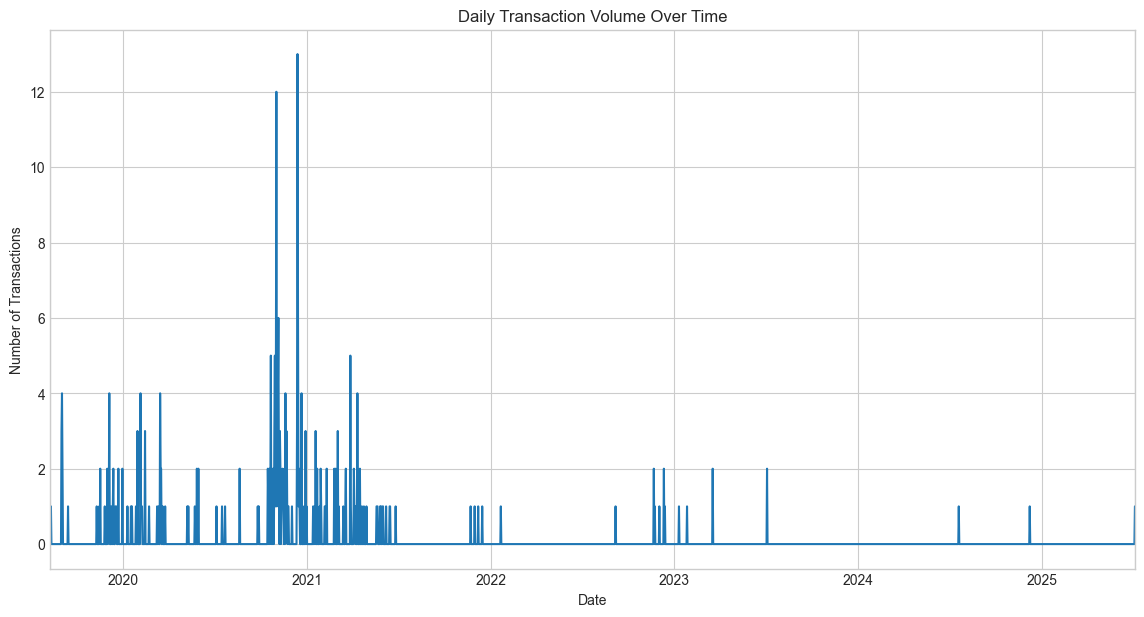

In [ ]:

if not df.empty:
    print("\nGenerating EDA Visualizations...")
    plt.style.use('seaborn-v0_8-whitegrid')

    # 1. Distribution of Transaction Values (Log Scale)
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_clean, x='value', bins=50, log_scale=True)
    plt.title('Distribution of Transaction Values (Log Scale)')
    plt.xlabel('Value (Log Scale)')
    plt.ylabel('Frequency')
    plt.show()

    # 2. Top 10 Most Called Functions
    if 'functionName' in df_clean.columns:
        plt.figure(figsize=(12, 8))
        top_functions = df_clean['functionName'].value_counts().nlargest(10)
        sns.barplot(y=top_functions.index, x=top_functions.values, palette='viridis')
        plt.title('Top 10 Most Frequently Called Functions')
        plt.xlabel('Count')
        plt.ylabel('Function Name')
        plt.tight_layout()
        plt.show()

    # 3. Transaction Volume Over Time
    if 'timeStamp' in df_clean.columns:
        plt.figure(figsize=(14, 7))
        df_clean.set_index('timeStamp')['value'].resample('D').count().plot()
        plt.title('Daily Transaction Volume Over Time')
        plt.xlabel('Date')
        plt.ylabel('Number of Transactions')
        plt.show()